Erabiliko diren moduloak inportartu:

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

Aldagaien Laburbilduma:

|Aldagaia|Definizioa|Unitatea|
|--------|-----------|-------|
|$t_{max}$ |Simulazioa denbora maximoa|$ms$|
|$\Delta t$|Denboraren diskretizazioa |$ms$|
|$C_{m}$   |Mintz kapazitatea         |$\frac{\mu F}{cm^{2}}$|
|$E_{Na}$  |Inbertsio potentziala, sodio kanaletarako|$mV$|
|$E_{K}$   |Inbertsio potentziala, potasio kanaletarako|$mV$|
|$E_{L}$   |Inbertsi potentziala|$mV$|
|$g_{Na}$  |Konduktantzia espezifikoa, sodio kanaletarako|$\frac{mS}{cm^{2}}$|
|$g_{K}$   |Konduktantzia espezifikoa, potasio kanaletarako|$\frac{mS}{cm^{2}}$|
|$g_{L}$   |Konduktantzia espezifikoa|$\frac{mS}{cm^{2}}$|
|$i_{mean}$|Batez-besteko intentsitate bat finkatu|$$\frac{\mu A}{cm^{2}}$$|
|$V_{rest}$|Egoera egonkorreko mintz potentziala|$mV$|

In [2]:
#Parametroak finkatu#####
t_max=100      #msegundu, Simulazio denbora osoa
delta_t=0.01   #msegundu, Diskretizazio denbora
C_m=0.01       #micro F/cm^2
E_Na=55.17     # mV
E_K=-72.14     # mV
E_L=-49.42     # mV
g_Na=1.2       # mS/cm^2
g_K=0.36       # mS/cm^2
g_L=0.003      # mS/cm^2
i_mean=0.1     # microA/cm^2
V_rest=-60.0   # mV
##########################

Erabiliko diren funtzio laguntzaileak:

$$\alpha_{n}=\frac{0.01(v+50)}{1-exp(\frac{-(v+50)}{10})}$$

$$\beta_{n}=0.125exp(\frac{-(v+60)}{80})$$

$$\alpha_{m}=\frac{0.1(v+35)}{1-exp(\frac{-(v+35)}{10})}$$

$$\beta_{m}=4.0exp(-0.0556(v+60))$$

$$\alpha_{h}=0.07exp(-0.05(v+60))$$

$$\beta_{h}=\frac{1}{1+exp(-0.1(v+30))}$$

In [3]:
#sarrera mvolt-etan izan behar da
def alpha_n(v):
    return 0.01*(v+50.0)/(1.0-np.exp(-(v+50.0)/10.0))

def beta_n(v):
    return 0.125*np.exp(-(v+60.0)/80.0)

def alpha_m(v):
    return 0.1*(v+35.0)/(1.0-np.exp(-(v+35.0)/10.0))

def beta_m(v):
    return 4.0*np.exp(-0.0556*(v+60.0))

def alpha_h(v):
    return 0.07*np.exp(-0.05*(v+60.0))

def beta_h(v):
    return 1/(1+np.exp(-0.1*(v+30.0)))

Bektoreak finkatu:

In [4]:
#Denbora eremu osoa finkatzen dugu. 0 s-tik hasiz, delta_t diskretizazio denbora aldiunez t_max aldiunerarte
t_eremua=np.arange(0,t_max,delta_t)

#Luzera finkatu
step=len(t_eremua)

#Vt bektorea finkatu
Vt=np.ones([step])

#Fase espaziorako bektoreaa finkatu
V_dot=np.ones([step])

#Intentsitatea bektore baten gorde
It=i_mean*np.ones([step])

#nt, mt, ht bektoreak finkatu
nt=np.ones([step])
mt=np.ones([step])
ht=np.ones([step])

#Fase espaziorako bektoreak finkatu
n_dot=np.ones([step])
m_dot=np.ones([step])
h_dot=np.ones([step])

#Hasierako balioak finkatu#
Vt[0]=V_rest
nt[0]=alpha_n(V_rest) / (alpha_n(V_rest) + beta_n(V_rest))
mt[0]=alpha_m(V_rest) / (alpha_m(V_rest) + beta_m(V_rest))
ht[0]=alpha_h(V_rest) / (alpha_h(V_rest) + beta_h(V_rest))

Ebatzi beharreko ekuazioa:

$$\frac{dv}{dt}=\frac{1}{C_{m}}[I-g_{Na}m^{3}h(v-E_{Na})-g_{K}n^{4}(v-E_{K})-g_{L}(v-E_{L})]$$

$$\frac{dn}{dt}=\alpha_{n}(v)(1-n)-\beta_{n}(v)n$$

$$\frac{dm}{dt}=\alpha_{m}(v)(1-m)-\beta_{m}(v)m$$

$$\frac{dh}{dt}=\alpha_{h}(v)(1-h)-\beta_{h}(v)h$$

Euler-en aurrerazko formula erabiliz diskretizazioa denboran egiteko:

$$v^{i+1}=v^{i}+\frac{\Delta t}{C_{m}}[I^{i}-g_{Na}(m^{3})^{i}h^{i}(v^{i}-E_{Na})-g_{K}(n^{4})^{i}(v^{i}-E_{K})-g_{L}(v^{i}-E_{L})]$$

$$n^{i+1}=n^{i}+\Delta t[\alpha_{n}(v^{i})(1-n^{i})-\beta_{n}(v^{i})n^{i}]$$

$$m^{i+1}=m^{i}+\Delta t[\alpha_{m}(v^{i})(1-m^{i})-\beta_{m}(v^{i})m^{i}]$$

$$h^{i+1}=h^{i}+\Delta t[\alpha_{h}(v^{i})(1-h^{i})-\beta_{h}(v^{i})h^{i}]$$

In [5]:
for i in range(0, step-1) :
    mt[i + 1] = mt[i] + delta_t * (alpha_m(Vt[i]) * (1 - mt[i]) - beta_m(Vt[i]) * mt[i])
    ht[i + 1] = ht[i] + delta_t * (alpha_h(Vt[i]) * (1 - ht[i]) - beta_h(Vt[i]) * ht[i])
    nt[i + 1] = nt[i] + delta_t * (alpha_n(Vt[i]) * (1 - nt[i]) - beta_n(Vt[i]) * nt[i])
    Vt[i + 1] = Vt[i] + (delta_t/C_m) * (It[i]-g_Na * mt[i] ** 3 * ht[i] * (Vt[i]-E_Na) - g_K * nt[i] ** 4 * (Vt[i]-E_K) - g_L * (Vt[i]-E_L)) 

Fase espazioa kalkulatu: $\frac{dv}{dt}$ VS $v$ ; $\frac{dn}{dt}$ VS $n$ ; $\frac{dm}{dt}$ VS $m$ ; $\frac{dh}{dt}$ VS $h$

In [6]:
#Hasierako egoerak
V_dot[0]= (Vt[1] - Vt[0]) / delta_t 
n_dot[0]= (nt[1] - nt[0]) / delta_t
m_dot[0]= (mt[1] - mt[0]) / delta_t
h_dot[0]= (ht[1] - ht[0]) / delta_t

#Gainontzeko aldiuneak
for i in range (0,step-1):
    V_dot[i+1]= (Vt[i+1] - Vt[i]) / delta_t
    n_dot[i+1]= (nt[i+1] - nt[i]) / delta_t
    m_dot[i+1]= (mt[i+1] - mt[i]) / delta_t
    h_dot[i+1]= (ht[i+1] - ht[i]) / delta_t

Ploteatu

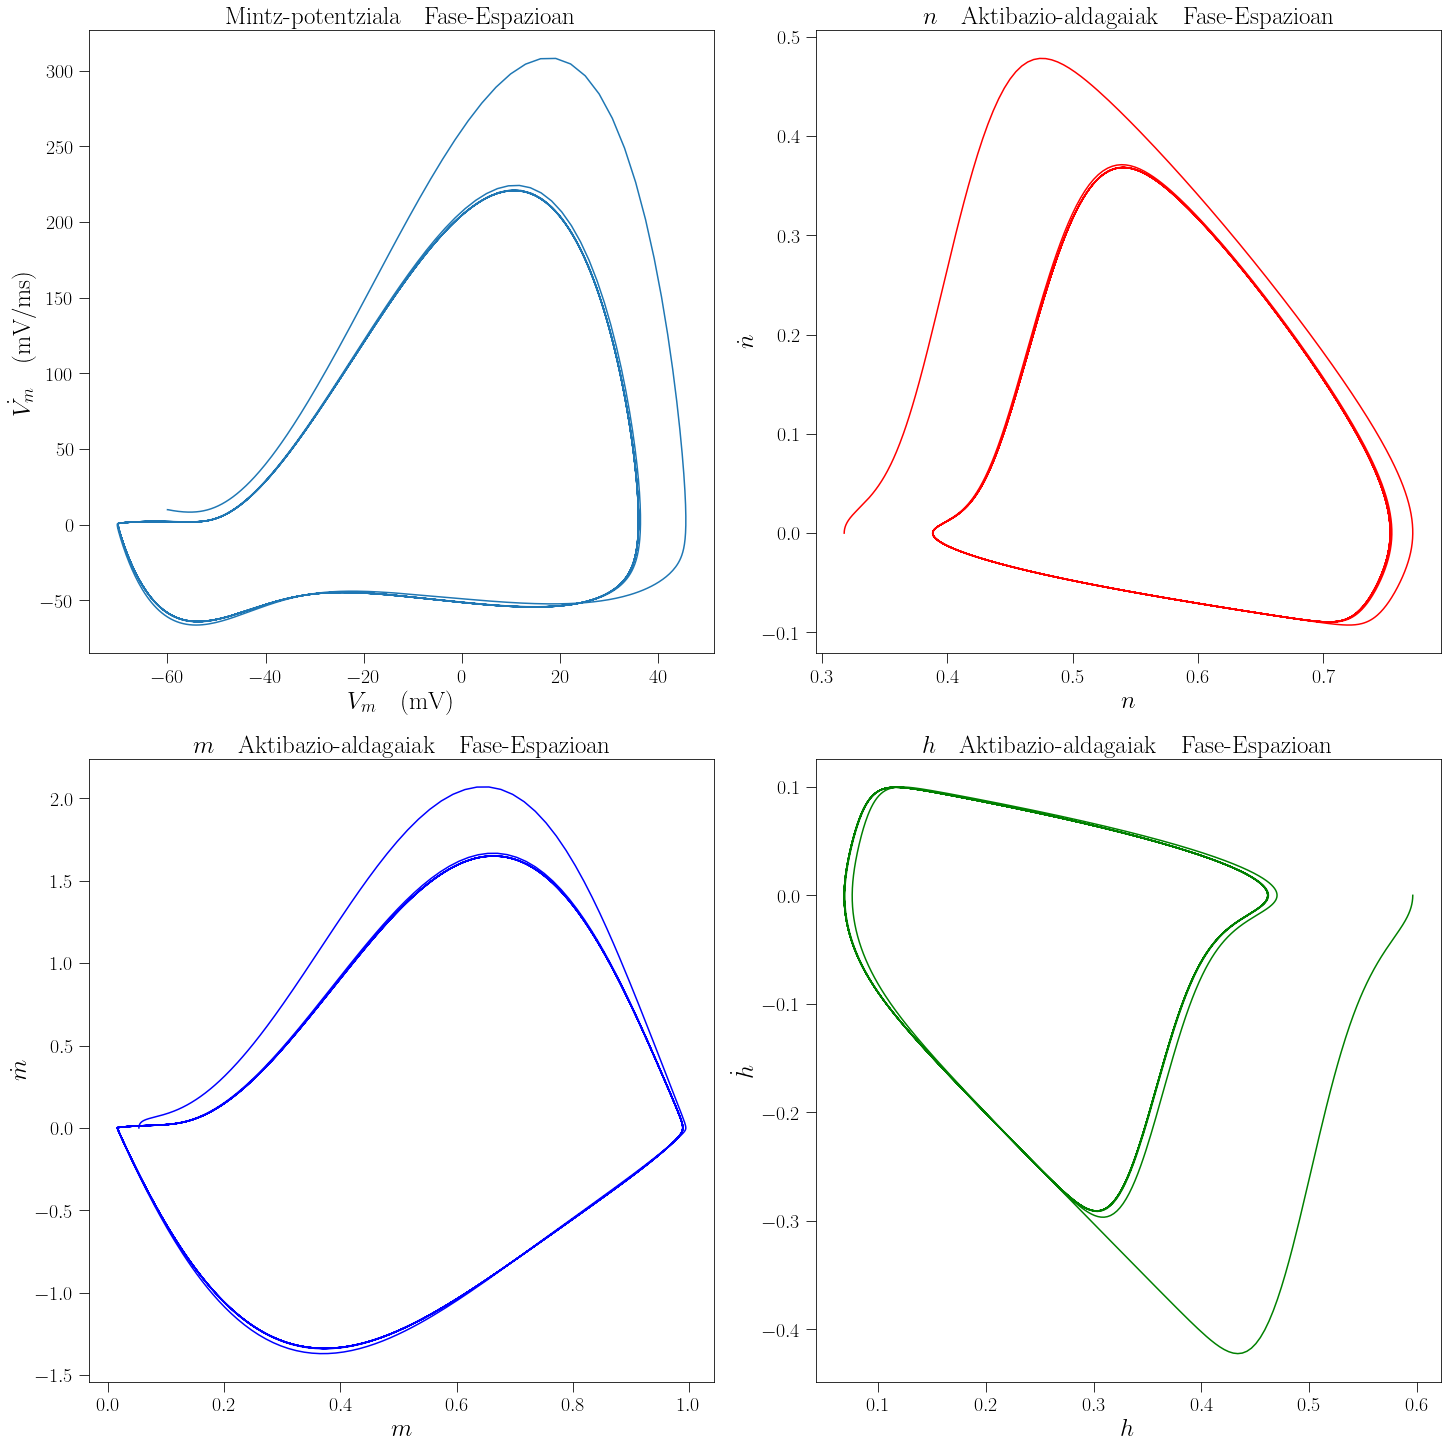

In [7]:
#################################  ### 00 ###

plt.rc('text', usetex=True)

#################################

#################################  ### 01 ###
fontsize = 25
labelsize = 20
#################################

fig2 = plt.figure(constrained_layout=True, figsize=(labelsize,labelsize))
spec2 = gridspec.GridSpec(ncols=2, nrows=2, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax1.plot(Vt,V_dot)
f2_ax1.set_xlabel(r'$V_{m} \quad \textrm{(mV)}$',fontsize=fontsize)
f2_ax1.set_ylabel(r'$\dot{V_{m}} \quad \textrm{(mV/ms)}$',fontsize=fontsize)
f2_ax1.set_title(r'$\textrm{Mintz-potentziala} \quad \textrm{Fase-Espazioan}$',fontsize=fontsize)

f2_ax2 = fig2.add_subplot(spec2[0, 1])
f2_ax2.plot(nt, n_dot, 'r')
f2_ax2.set_xlabel(r'$n$',fontsize=fontsize)
f2_ax2.set_ylabel(r'$\dot{n}$',fontsize=fontsize)
f2_ax2.set_title(r'$n \quad \textrm{Aktibazio-aldagaiak} \quad \textrm{Fase-Espazioan}$',fontsize=fontsize)

f2_ax3 = fig2.add_subplot(spec2[1, 0])
f2_ax3.plot(mt, m_dot, 'b')
f2_ax3.set_xlabel(r'$m$',fontsize=fontsize)
f2_ax3.set_ylabel(r'$\dot{m}$',fontsize=fontsize)
f2_ax3.set_title(r'$m \quad \textrm{Aktibazio-aldagaiak} \quad \textrm{Fase-Espazioan}$',fontsize=fontsize)

f2_ax4 = fig2.add_subplot(spec2[1, 1])
f2_ax4.plot(ht, h_dot, 'g')
f2_ax4.set_xlabel(r'$h$',fontsize=fontsize)
f2_ax4.set_ylabel(r'$\dot{h}$',fontsize=fontsize)
f2_ax4.set_title(r'$h \quad \textrm{Aktibazio-aldagaiak} \quad \textrm{Fase-Espazioan}$',fontsize=fontsize)

######################################  ### 04 ###
axes_fig = [f2_ax1,f2_ax2,f2_ax3,f2_ax4] # irudiak dazkanaren arabera

for i in axes_fig:
    i.tick_params(axis='y', labelsize=labelsize, pad=5, length=10);
    i.tick_params(axis='x', labelsize=labelsize, pad=5, length=10);

plt.savefig('H-H_Ereduko_Fase_Espazioa.pdf', format='pdf', dpi=180,bbox_inches="tight")